# Machine learning project on Big Mart Sales Prediction

## importing the dataset

In [1]:
import pandas as pd
df = pd.read_csv('Amazon_Sales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.shape

(8523, 12)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## data pre-processing

### Eliminating null values

In [2]:
# Item_Weight has null values.It is a Continuous attribute. So we replace null values with mean

mean_of_item_weight = df.pivot_table(index ="Item_Type", values = "Item_Weight", aggfunc = (lambda x: x.mean()[0]))
mean_of_item_weight

C:\Users\Dreamtopia\AppData\Local\Temp\ipykernel_2684\1739583573.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_of_item_weight = df.pivot_table(index ="Item_Type", values = "Item_Weight", aggfunc = (lambda x: x.mean()[0]))


,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [3]:
missing_values = df['Item_Weight'].isnull()
df.loc[missing_values,'Item_Weight']=df.loc[missing_values,'Item_Type'].apply(lambda x:mean_of_item_weight.at[x, "Item_Weight"])

In [4]:
# Outlet_Size has null values.It is a Categorical attribute So we replace null values with mode

mode_of_outlet_size = df.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [5]:
missing_values = df['Outlet_Size'].isnull()
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size.at[x,'Outlet_Size'])

In [83]:
# df.info()

In [6]:
# Item_Fat_Content column contains different notations for same value.Combining those values
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# In "item_visibility" column, many items visibility as 0.0 so filling them with MEAN 

In [8]:
mean_visibility = df.pivot_table(index = "Item_Identifier",  values = "Item_Visibility")
mean_visibility

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
...,...
NCZ30,0.024956
NCZ41,0.051623
NCZ42,0.009044


In [9]:
df.loc[(df["Item_Visibility"] == 0.0), "Item_Visibility"] = df.loc[(df["Item_Visibility"] == 0.0), "Item_Identifier"].apply(lambda x : mean_visibility.at[x, "Item_Visibility"])                                  

### Convert Categorical attributes to numeric

In [10]:
# using one hot encoding technique for Item_Fat_Content, Outlet_Location_Type ,
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type'])

# using Label Encoding for Item_Type as it has many unique values so one hot encoding causes increase
# in no of features.

# using Label Encoding for Outlet_Size as it gives precedence in number in right way.

from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Item_Type']=lr.fit_transform(df['Item_Type']) 
df['Outlet_Size']=lr.fit_transform(df['Outlet_Size'])
df['Item_Identifier']=lr.fit_transform(df['Item_Identifier'])
df['Outlet_Identifier']=lr.fit_transform(df['Outlet_Identifier'])

df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300,0.016047,4,249.8092,9,1999,1,3735.1380,1,0,1,0,0,0,1,0,0
1,8,5.920,0.019278,14,48.2692,3,2009,1,443.4228,0,1,0,0,1,0,0,1,0
2,662,17.500,0.016760,10,141.6180,9,1999,1,2097.2700,1,0,1,0,0,0,1,0,0
3,1121,19.200,0.015274,6,182.0950,0,1998,2,732.3800,0,1,0,0,1,1,0,0,0
4,1297,8.930,0.008082,9,53.8614,1,1987,0,994.7052,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,1987,0,2778.3834,1,0,0,0,1,0,1,0,0
8519,897,8.380,0.046982,0,108.1570,7,2002,2,549.2850,0,1,0,1,0,0,1,0,0
8520,1357,10.600,0.035186,8,85.1224,6,2004,2,1193.1136,1,0,0,1,0,0,1,0,0
8521,681,7.210,0.145221,13,103.1332,3,2009,1,1845.5976,0,1,0,0,1,0,0,1,0


###  Dimensionality reduction 

#### feature selection based on Pearson's correlation coefficient 

In [88]:
# calculating correlation of dependent variables with independent variable
corr= abs(df.corr()["Item_Outlet_Sales"])
print(corr)

Item_Identifier                  0.002869
Item_Weight                      0.012088
Item_Visibility                  0.128449
Item_Type                        0.017048
Item_MRP                         0.567574
Outlet_Identifier                0.162325
Outlet_Establishment_Year        0.049135
Outlet_Size                      0.162753
Item_Outlet_Sales                1.000000
Item_Fat_Content_Low Fat         0.018719
Item_Fat_Content_Regular         0.018719
Outlet_Location_Type_Tier 1      0.111287
Outlet_Location_Type_Tier 2      0.058261
Outlet_Location_Type_Tier 3      0.046376
Outlet_Type_Grocery Store        0.411727
Outlet_Type_Supermarket Type1    0.108765
Outlet_Type_Supermarket Type2    0.038059
Outlet_Type_Supermarket Type3    0.311192
Name: Item_Outlet_Sales, dtype: float64


In [11]:
# dropping columns for which corr<0.1
df.drop(['Item_Identifier','Item_Weight','Item_Type','Outlet_Establishment_Year','Item_Fat_Content_Low Fat','Item_Fat_Content_Regular','Outlet_Location_Type_Tier 2','Outlet_Location_Type_Tier 3','Outlet_Type_Supermarket Type2'],axis=1,inplace=True)

### Normalization

In [12]:
# mean=0 , standard deviation=1
import numpy as np
Y = np.array(df['Item_Outlet_Sales'])
Y = Y.reshape(Y.shape[0],1)
df.drop(['Item_Outlet_Sales'],axis=1,inplace=True)
X=np.array(df)
print(X.shape)
print(Y.shape)

(8523, 8)
(8523, 1)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [14]:
print(X)

[[-1.07660592  1.74745381  1.50781338 ... -0.38152918  0.72680189
  -0.35102831]
 [-1.01173738 -1.48902325 -0.60707075 ... -0.38152918 -1.37589075
  -0.35102831]
 [-1.06229523  0.01004021  1.50781338 ... -0.38152918  0.72680189
  -0.35102831]
 ...
 [-0.69234419 -0.89720755  0.45037131 ... -0.38152918  0.72680189
  -0.35102831]
 [ 1.5168656  -0.60797692 -0.60707075 ... -0.38152918 -1.37589075
  -0.35102831]
 [-0.49775335 -1.05226104  1.15533269 ... -0.38152918  0.72680189
  -0.35102831]]


###  Splitting the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5966, 8)
(2557, 8)
(5966, 1)
(2557, 1)


### training a model

### a) Linear Regression using OLS

In [16]:
# Prediction of sales is a regression problem . So we are using Linear regression here.
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train) 

print("coefficients: ",model.coef_)
print("intercept: ",model.intercept_)

y_predict_test=model.predict(X_test)
print("y_predict_test ",y_predict_test)

y_predict_train=model.predict(X_train)
print("y_predict_train ",y_predict_train)

coefficients:  [[  -5.50515425  955.8134156   -14.7036463    10.11480636    3.50061146
  -543.2978252   155.61026434  529.41128642]]
intercept:  [2179.11778145]
y_predict_test  [[2590.51828707]
 [2503.46138957]
 [2165.50839571]
 ...
 [1715.165149  ]
 [2574.29188654]
 [2767.09426532]]
y_predict_train  [[1608.39708998]
 [2426.3133582 ]
 [3973.73986414]
 ...
 [1357.95401673]
 [2003.24877824]
 [2923.91353413]]


### Performance Evaluation

In [17]:
from sklearn import metrics
print("Evaluating model on test data")
print("Mean Square Error: ",metrics.mean_squared_error(Y_test, y_predict_test))
print("r2 score: ", metrics.r2_score(Y_test, y_predict_test))

Evaluating model on test data
Mean Square Error:  1332293.7374701912
r2 score:  0.562476929810443


In [18]:
print("Evaluating model on train data")
print("Mean Square Error: ",metrics.mean_squared_error(Y_train, y_predict_train))
print("r2 score: ", metrics.r2_score(Y_train, y_predict_train))

Evaluating model on train data
Mean Square Error:  1251246.0907254238
r2 score:  0.5615875989569614


### Linear regression using gradient descent

In [19]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np
class MultiVar_LinearReg_GD:
    
    def __init__(self): 
        self.coeff=None
        self.history=[]   
        
    def train(self,X,Y,lr,epochs):
        m=X.shape[0]                              #  no of records  
        
        X=add_dummy_feature(X,value=1.0)      
       
        self.coeff=np.zeros((X.shape[1],1))  
  
        for i in range(epochs):
            
            y_pred= np.dot(X,self.coeff) 
            error = y_pred-Y
            
            cost=np.dot(error.T,error)/(2*m)
            self.history.append(cost[0][0])
            print('Cost is ',cost[0][0]) 
            
            self.coeff=self.coeff-(lr/m)*np.dot(X.T,error)
            
        
    def predict(self,X):
        X=add_dummy_feature(X,value=1.0)
        Y=np.dot(X,self.coeff)
        return Y

In [33]:
model=MultiVar_LinearReg_GD()
model.train(X_train,Y_train,0.9,50)

Cost is  3775999.883713147
Cost is  746112.9200338378
Cost is  664319.8674759769
Cost is  648000.7497240129
Cost is  641710.3130209062
Cost is  638477.9426701525
Cost is  636360.9925115341
Cost is  634753.2055922978
Cost is  633444.4205397591
Cost is  632347.4191428547
Cost is  631416.2528661045
Cost is  630620.999380956
Cost is  629939.439932672
Cost is  629353.9572627835
Cost is  628850.1399747732
Cost is  628416.009026087
Cost is  628041.5128391699
Cost is  627718.16335113
Cost is  627438.7590350612
Cost is  627197.1675208968
Cost is  626988.1516008858
Cost is  626807.2279689674
Cost is  626650.5512573746
Cost is  626514.8179817045
Cost is  626397.1863885007
Cost is  626295.2091664062
Cost is  626206.7766747964
Cost is  626130.0688500456
Cost is  626063.514326173
Cost is  626005.7555915329
Cost is  625955.6192222898
Cost is  625912.0904044481
Cost is  625874.2910915939
Cost is  625841.4612540513
Cost is  625812.9427631183
Cost is  625788.1655260635
Cost is  625766.635546946
Cost is 

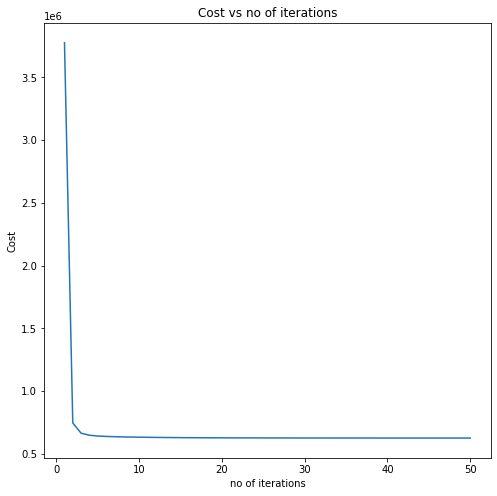

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
xpts=np.arange(1,51).tolist()
plt.plot(xpts,model.history)
plt.title("Cost vs no of iterations")
plt.xlabel("no of iterations")
plt.ylabel("Cost")
plt.show()

In [35]:
y_predict = model.predict(X_test)
print("r2 score: ", metrics.r2_score(Y_test, y_predict))

r2 score:  0.562445991740717
